<a href="https://colab.research.google.com/github/xec9cp/clustering_assignment/blob/main/assignment_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [1]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

Text(0.5, 1.0, 'Noise = 0.125')

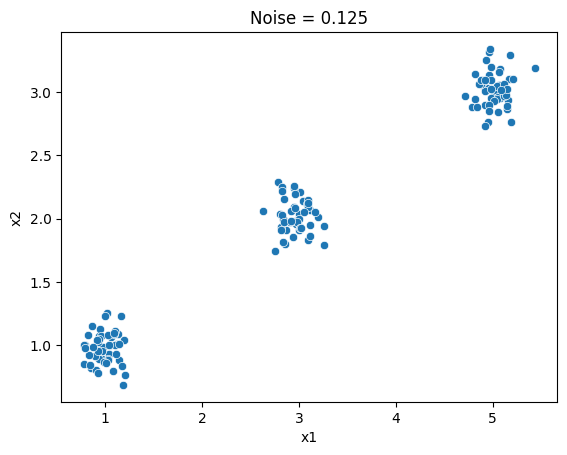

In [10]:
sns.scatterplot(x='x1',y='x2',data=df0_125).set_title('Noise = 0.125')

Text(0.5, 1.0, 'Noise = 0.25')

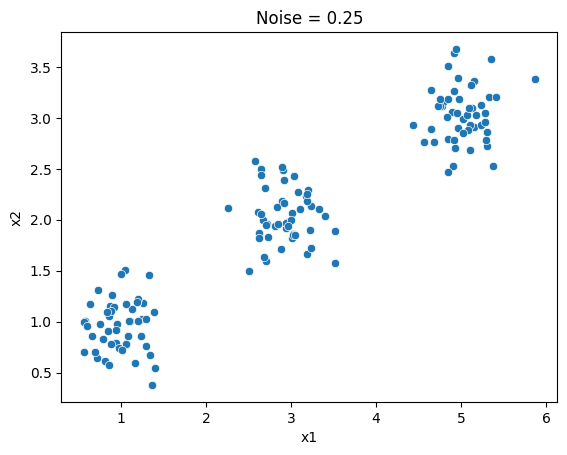

In [11]:
sns.scatterplot(x='x1',y='x2',data=df0_25).set_title('Noise = 0.25')

Text(0.5, 1.0, 'Noise = 0.5')

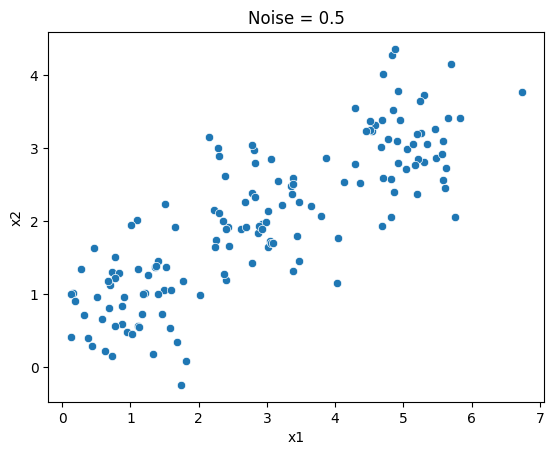

In [12]:
sns.scatterplot(x='x1',y='x2',data=df0_5).set_title('Noise = 0.5')

Text(0.5, 1.0, 'Noise = 1.0')

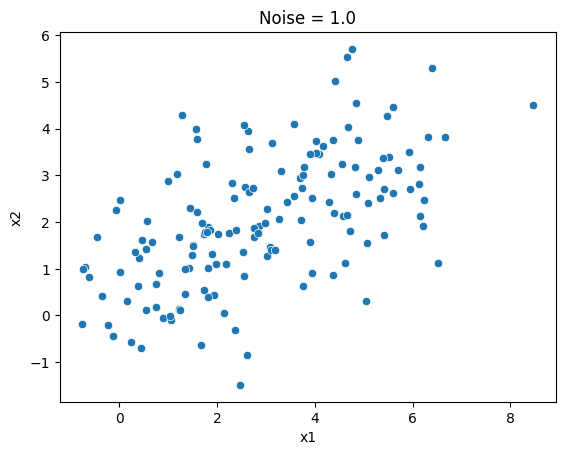

In [13]:
sns.scatterplot(x='x1',y='x2',data=df1_0).set_title('Noise = 1.0')

Text(0.5, 1.0, 'Noise = 2.0')

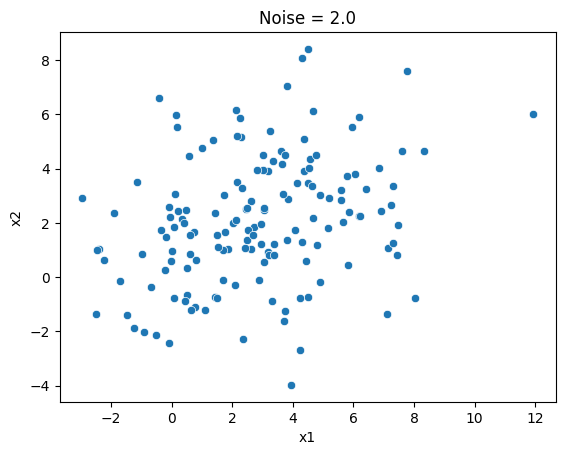

In [14]:
sns.scatterplot(x='x1',y='x2',data=df2_0).set_title('Noise = 2.0')

- As the noise gets bigger, the data shows less sign of clustering and they spread more generally.
- When the noise is small, we can see clearly there are 3 groups (eg. noise = 0.125 and noise = 0.25).
- When the noise is big, we can hardly see any pattern shown in the plot (eg. noise = 2.0).
- For noise = 0.5 and 1.0, there is no clustering shown, but we can see a moderate positive linear relationship between x1 and x2.
---

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

In [26]:
from sklearn.cluster import KMeans # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

def scree_plot(df): # Create a scree plot:
  X = df.loc[:,["x1","x2"]].apply(maxmin)
  k_bar = 10
  SSE = [] # We'll store the training error here
  for k in range(k_bar): # For indices from 0 to k_bar-1
      model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
      model = model.fit(X) # Fit the model
      SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector
  sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

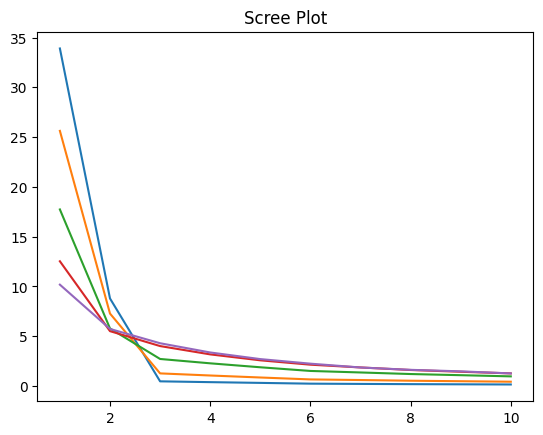

In [38]:
scree_plot(df0_125)
scree_plot(df0_25)
scree_plot(df0_5)
scree_plot(df1_0)
scree_plot(df2_0)

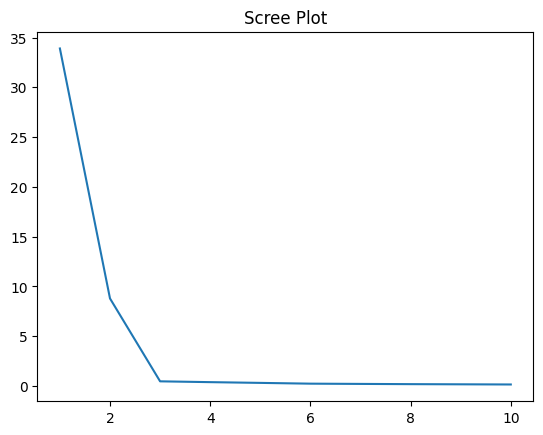

In [35]:
scree_plot(df0_125)

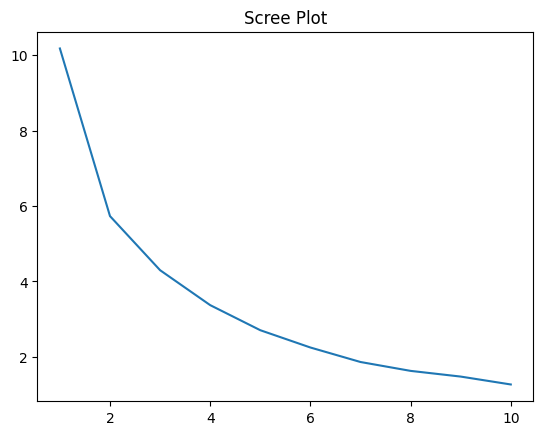

In [36]:
scree_plot(df2_0)

- When we hold k constant, the higher the noise, the smoother the Scree plot.
- Also, the SSE of the start point for the scree plot gets lower as noise increases.
---

4. Explain the intuition of the elbow, using this numerical simulation as an example.

- The elbow in the scree plot shows the best choice of k (number of groups) which has the lowest SSE while not relatively large.
- From the simulation we had previously, it shows that the noise of the data could also affect our choice of best k as it seems to averaging out the SSE among the choice of k, make elbows smooth and hard to determine.
---

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?

In [60]:
data = pd.read_csv("https://raw.githubusercontent.com/xec9cp/clustering_assignment/refs/heads/main/data/2022%20election%20cycle%20fundraising.csv")
data.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [61]:
data["Raised"] = data["Raised"].str.replace('$', '').str.replace(',', '').astype('float')
data["Spent"] = data["Spent"].str.replace('$', '').str.replace(',', '').astype('float')
data["Cash on Hand"] = data["Cash on Hand"].str.replace('$', '').str.replace(',', '').astype('float')
data["Debts"] = data["Debts"].str.replace('$', '').str.replace(',', '').astype('float')
data.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0


2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.

3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.

4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?

5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

-
---

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?